(array([2.86014077e-02, 7.72238007e-02, 7.43636599e-02, 1.05825208e-01,
        1.68748305e-01, 1.91629431e-01, 1.91629431e-01, 2.11650417e-01,
        2.31671402e-01, 2.77433654e-01, 3.26056047e-01, 3.37496610e-01,
        4.09000129e-01, 4.49042100e-01, 4.54762382e-01, 5.29126042e-01,
        5.60587590e-01, 5.69168012e-01, 6.00629561e-01, 6.23510687e-01,
        6.29230968e-01, 7.49356881e-01, 8.80923356e-01, 6.97874347e-01,
        9.38126171e-01, 9.29545749e-01, 9.69587719e-01, 1.04681152e+00,
        1.04967166e+00, 1.08113321e+00, 1.10115419e+00, 1.21269968e+00,
        1.24416123e+00, 1.23272067e+00, 1.25274166e+00, 1.48155292e+00,
        1.46439207e+00, 1.47869278e+00, 1.52445503e+00, 1.62455995e+00,
        1.70464390e+00, 1.79044812e+00, 1.92201459e+00, 2.07360205e+00,
        1.91915445e+00, 2.10220346e+00, 2.10506360e+00, 2.25951120e+00,
        2.48260218e+00, 2.38821754e+00, 2.51692387e+00, 2.55410570e+00,
        2.82867922e+00, 2.78005682e+00, 2.71713373e+00, 2.842979

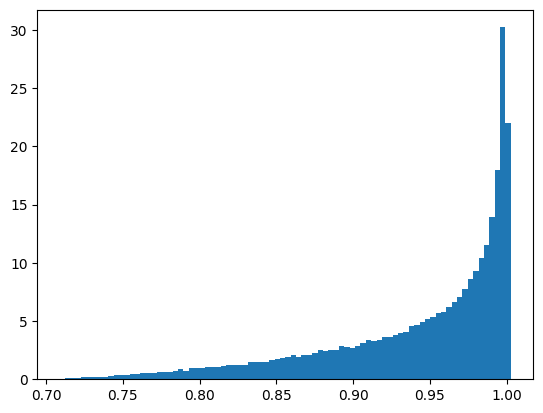

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.visualization.hist import hist as fancyhist

mean = 1
std = 0.000001


chi = np.random.uniform(0, 1, 100000)

M = np.random.normal(mean, std, 100000)

M_irr = M*np.sqrt((1+np.sqrt(1-chi**2))/2)
x = np.linspace(min(M_irr), max(M_irr))

fancyhist(M_irr, bins="freedman", density=True)

In [12]:
from sklearn.neighbors import KernelDensity

def kde_sklearn(data, bandwidth = 1.0, kernel="linear"):
    kde_skl = KernelDensity(bandwidth = bandwidth, 
                            kernel=kernel)
    kde_skl.fit(data[:, np.newaxis])
    log_pdf = kde_skl.score_samples(x[:, np.newaxis]) # sklearn returns log(density)

    return np.exp(log_pdf)

KDE = kde_sklearn(M_irr,bandwidth=0.1,kernel="linear") 


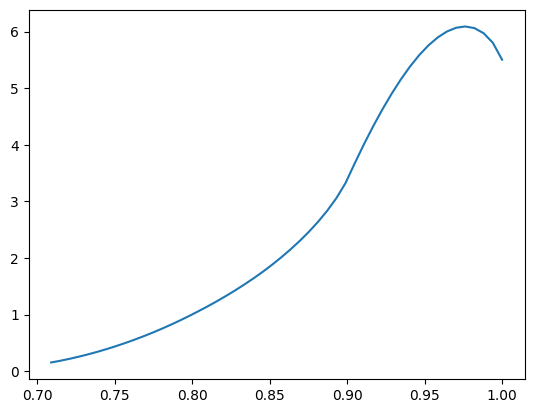

In [13]:
plt.plot(x, KDE) 

In [14]:
import scipy.stats as stats
from scipy.stats import norm
from scipy.stats import uniform
import scipy.stats
from scipy import optimize
from astroML import stats as astroMLstats

f = np.sqrt((1+np.sqrt(1-chi**2))/2)
print(stats.ks_2samp(M_irr, f))

KstestResult(statistic=0.0010000000000000009, pvalue=0.9999999997471354, statistic_location=0.9999999999928068, statistic_sign=-1)
